In [1]:
import pandas as pd
import sklearn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
headers = list(pd.read_csv(r"D:\Data Science Projects\spambase.names", sep="|").iloc[29:,0].dropna())
headers.append('spam')

In [4]:
data = pd.read_csv(r"D:\Data Science Projects\spambase.data", header=None)
data.columns = headers

In [5]:
y = data['spam']
features = data.drop(['spam'], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, y,test_size=0.25)

# Decision tree

In [7]:
dt_classifier = DecisionTreeClassifier(min_samples_leaf=100)

In [8]:
dt_y_score = dt_classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [9]:
dt_roc = roc_curve(y_test,dt_y_score)

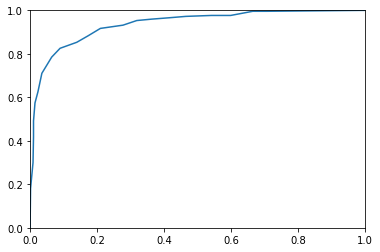

In [10]:
plt.plot(dt_roc[0], dt_roc[1],zorder=2)
plt.scatter(dt_roc[0], dt_roc[1],zorder=1, s=0)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

# Random forest

In [11]:
rf_classifier = RandomForestClassifier(min_samples_leaf=100)

In [12]:
rf_y_score = rf_classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
rf_roc = roc_curve(y_test,rf_y_score)

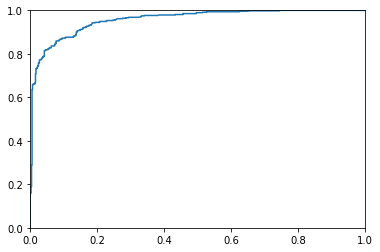

In [14]:
plt.plot(rf_roc[0], rf_roc[1],zorder=2)
plt.scatter(rf_roc[0], rf_roc[1],zorder=1, s=0)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

# Gradient boost

In [15]:
gb_classifier = GradientBoostingClassifier()

In [16]:
gb_y_score = gb_classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]

In [17]:
gb_roc = roc_curve(y_test,gb_y_score)

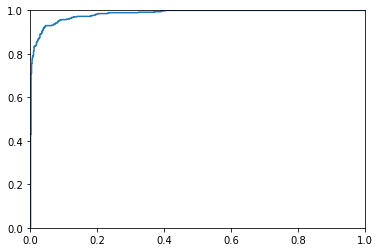

In [18]:
plt.plot(gb_roc[0], gb_roc[1],zorder=2)
plt.scatter(gb_roc[0], gb_roc[1],zorder=1, s=0)
plt.ylim(0,1)
plt.xlim(0,1)
plt.show()

# Comparison: Decision  tree vs Random forest

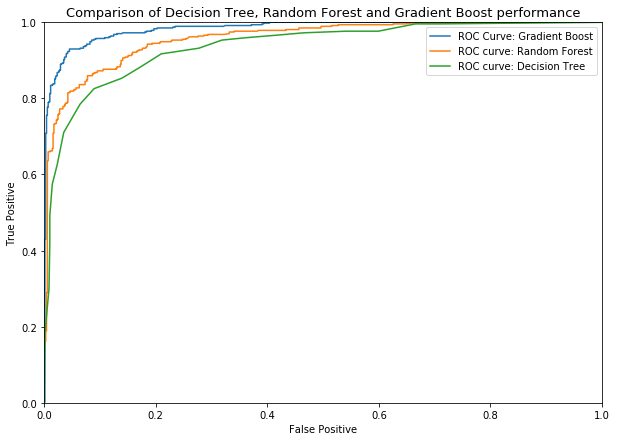

In [19]:
plt.figure(figsize=(10,7))
plt.plot(gb_roc[0], gb_roc[1],zorder=2)
plt.scatter(gb_roc[0], gb_roc[1],zorder=1, s=0)
plt.plot(rf_roc[0], rf_roc[1],zorder=2)
plt.scatter(rf_roc[0], rf_roc[1],zorder=1, s=0)
plt.plot(dt_roc[0], dt_roc[1],zorder=2)
plt.scatter(dt_roc[0], dt_roc[1],zorder=1, s=0)
plt.legend(['ROC Curve: Gradient Boost',\
            'ROC curve: Random Forest',\
            'ROC curve: Decision Tree'])
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Comparison of Decision Tree, Random Forest and Gradient Boost performance'\
          , size=13)
plt.show()